# Which U.S. Airport Has the Longest Flight Delays?
#### A visualization for flight delay patterns in major US airports by Chen Chen

In [1]:
import pandas as pd
import numpy as np
import bqplot
import ipywidgets

In [2]:
url = 'https://github.com/RealTimeWeb/datasets/blob/2fe5befd251c783744d000bd4763e277616a152f/datasets/csv/airlines/airlines.csv?raw=true'
airlines = pd.read_csv(url)
airlines

,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Cancelled,Carriers.Total,Code,Delayed,Diverted,...,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Month,Month Name,Name,On Time,Year
0,1009,1275,3217,17,328,216,11,ATL,5843,27,...,68335,118831,518,268764,19474,6,June,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",23974,2003
1,374,495,685,3,66,138,14,BOS,1623,3,...,28189,24400,99,77167,4160,6,June,"Boston, MA: Logan International",7875,2003
2,296,477,389,8,78,29,11,BWI,1245,15,...,26810,17556,278,64480,6201,6,June,"Baltimore, MD: Baltimore/Washington Internatio...",6998,2003
3,300,472,735,2,54,73,11,CLT,1562,14,...,23379,23804,127,65865,3792,6,June,"Charlotte, NC: Charlotte Douglas International",7021,2003
4,283,268,487,4,58,74,13,DCA,1100,18,...,13712,20999,120,52747,4141,6,June,"Washington, DC: Ronald Reagan Washington National",5321,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,280,397,171,2,20,97,11,SAN,871,18,...,23023,6021,79,46206,1601,1,January,"San Diego, CA: San Diego International",5030,2016
4404,357,513,351,2,50,104,10,SEA,1274,31,...,32693,11466,73,74017,4324,1,January,"Seattle, WA: Seattle/Tacoma International",8330,2016
4405,560,947,2194,2,119,449,10,SFO,3825,20,...,72557,153416,66,278610,8930,1,January,"San Francisco, CA: San Francisco International",8912,2016
4406,338,540,253,3,38,84,8,SLC,1175,14,...,33682,8057,57,76978,3116,1,January,"Salt Lake City, UT: Salt Lake City International",7426,2016


The dataset was obtained from the github page of CORGIS Dataset Project (https://github.com/RealTimeWeb/datasets/blob/master/datasets/csv/airlines/airlines.csv) and detailed explanations regarding the data could be retrieved from the webpage of CORGIS Dataset Project (https://think.cs.vt.edu/corgis/csv/airlines/).

In [3]:
airlines['Minutes Delayed.Total'] = airlines['Minutes Delayed.Total'].astype('float')

In [4]:
# Check for any null values
airlines.isnull().sum()

# of Delays.Carrier                         0
# of Delays.Late Aircraft                   0
# of Delays.National Aviation System        0
# of Delays.Security                        0
# of Delays.Weather                         0
Cancelled                                   0
Carriers.Total                              0
Code                                        0
Delayed                                     0
Diverted                                    0
Flights.Total                               0
Label                                       0
Minutes Delayed.Carrier                     0
Minutes Delayed.Late Aircraft               0
Minutes Delayed.National Aviation System    0
Minutes Delayed.Security                    0
Minutes Delayed.Total                       0
Minutes Delayed.Weather                     0
Month                                       0
Month Name                                  0
Name                                        0
On Time                           

In [5]:
A = np.array(airlines['Code'])
B = np.array(airlines['Year'])
C = np.array(airlines['Minutes Delayed.Total'])
D = np.array(airlines['Month'])

df = pd.DataFrame({'Code':A, 'Year':B, 'Minutes Delayed.Total':C})
df2 = pd.DataFrame({'Month':D, 'Minutes Delayed.Total':C})

table = pd.pivot_table(df, values=['Minutes Delayed.Total'], index=['Year'], columns = ['Code'], aggfunc=np.mean, fill_value=0)
table2 = pd.pivot_table(df2, values=['Minutes Delayed.Total'], index=['Month'], aggfunc=np.sum, fill_value=0)

aname = table.columns.levels[1].to_list()

In [6]:
####### GRID HEAT MAP #######
# scales
col_sc = bqplot.ColorScale(scheme='RdPu')
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()

# axis
col_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')
x_ax = bqplot.Axis(scale=x_sc, label='Airport.Code', tick_rotate=45)
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical', label='Year')

# marks
heat_map = bqplot.GridHeatMap(color=table.values,
                              row=table.index,
                              column=aname, 
                              scales={'color':col_sc,'row':y_sc, 'column':x_sc},
                              interactions={'click':'select'},
                              selected_style={'fill':'blue'})

fig = bqplot.Figure(marks=[heat_map], axes=[col_ax,x_ax, y_ax])

fig

Figure(axes=[ColorAxis(orientation='vertical', scale=ColorScale(scheme='RdPu'), side='right'), Axis(label='Air…

In [7]:
myLabel = ipywidgets.Label()

####### BAR PLOT #######
# scales
x_scb = bqplot.LinearScale()
y_scb = bqplot.LinearScale()

# axis 
x_axb = bqplot.Axis(label='Month', scale=x_scb)
y_axb = bqplot.Axis(label='Total Minutes Delayed', scale=y_scb, orientation='vertical')

In [8]:
footage, footage_edges = np.histogram(table2.index.values, 
                                      weights=table2['Minutes Delayed.Total'].values, bins=10) 
footage_centers = (footage_edges[:-1] + footage_edges[1:])/2
footage_hist = bqplot.Bars(x=footage_centers, y=footage, scales={'x':x_scb, 'y':y_scb},padding=0.03)
fig_bars = bqplot.Figure(marks=[footage_hist],axes=[x_axb, y_axb])
fig_bars

Figure(axes=[Axis(label='Month', scale=LinearScale()), Axis(label='Total Minutes Delayed', orientation='vertic…

In [9]:
def on_selection(change):
    i,j = change['owner'].selected[0]
    v = table.values[i,j]
    c = table.columns.levels[1][j]
    myLabel.value = 'Airport: ' + str(c) + '; Mean of Total Minutes Delayed: ' + str(v)
    
    mask = (airlines['Year'] == table.index[i]) & \
            (airlines['Code'] == table.columns.levels[1][j])
    airlines_subset = airlines[mask]
    grouped = airlines_subset.groupby("Month")["Minutes Delayed.Total"].sum()
    months = grouped.index
    minutes = grouped.values
    footage_hist.x = months
    footage_hist.y = minutes
    
heat_map.observe(on_selection,'selected')

In [10]:
figures = ipywidgets.HBox([fig,fig_bars])
fig.layout.min_width='800px'
fig_bars.layout.min_width='400px'
dashboard = ipywidgets.VBox([myLabel,figures])

dashboard

The code above are modified based on my previous code for homework 6 and Week 7's in class notebook (https://uiuc-ischool-dataviz.github.io/is445_spring2022/nbv.html?notebook_name=%2Fis445_spring2022%2Fweek07%2FinClass_week07.ipynb).

This dashboard is trying to explore the length of flight delays happened in each major US airport between June 2003 and January 2016. On the left hand side, the Grid Heat Map illustrates the monthly average minutes of flight delays at each airport within every single year and the darker the cell is, the longer the average delays are for that specific airport at such year. For example, we can tell from the plot that ATL(Hartsfield-Jackson Atlanta International Airport) and ORD(Chicago O'Hare International) are the top two airports that had experienced long delays during the 13 years because of the relatively darker cells they have. On the right hand side, the bar plot shows the details of total minutes delayed within each month of a given year and airport. By simply clicking the cell of intended year and airport in the Grid Heat Map, the audience can have a clear understanding about the patterns of monthly flight delays throughout the given year for such airport via the linked bar plot. In this way, the dashboard might help tourists who would be visiting those airports to learn about the potential length of flight delays and plan their schedules accordingly to avoid problems in advance.

The first contextual visualization shown right below is based on the Airline On-Time Statistics and Delay Causes provided by Bureau of Transportation Statistics (https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?6B2r=FE&20=E). It visualizes data about the causes of delays in US domestic flights operated by major air carriers at ORD(Chicago O'Hare International) between June 2003 and January 2016. The reason why I choose ORD here is because from the dashboard above, we can tell that it is the airport that had experienced the longest delays. Since the central interactive visualization is mainly focusing on the detailed length of delays in minutes, this complementary graph could help us dig into the reasons behind flight delays and understand the length of delays in a new perspective. From the visualization below, we can see that the top 1 reason for flight delays at ORD is due to the National Aviation System Delay (11.3%).

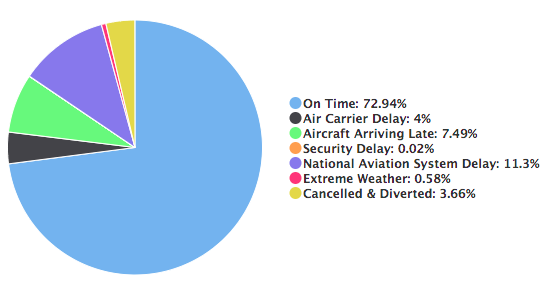

The second contextual visualization is also from the Bureau of Transportation Statistics (https://www.transtats.bts.gov/OT_Delay/ot_delaycause1.asp?6B2r=I&20=E) and it is kind of a continuation for the first contextual visualization. From the graph above, we realize that National Aviation System Delay is the biggest reason for flight delays in ORD between June 2003 to January 2016 and this time we are going to continue breaking down the causes of National Aviation System Delay. According to the definition from Bureau of Transportation Statistics (https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations), National Aviation System Delay refers to a broad range of circumstances led to delays, such as non-extreme weather conditions and heavy air traffic volume. Based on the visualization below, weather accounts for the highest proportion of such delays, i.e. 77.49%. If we go back to the main dashboard, we can see that the longer delays at ORD tend to happen during winter months and that are probably due to the heavy snow storms which usually occur in Midwest's winter.

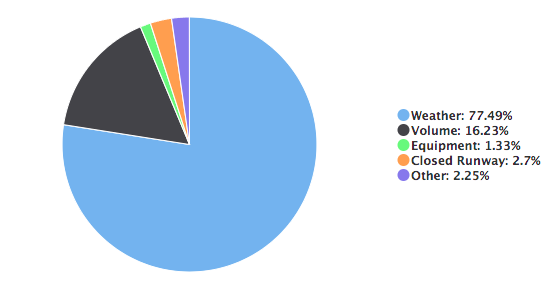